# Example 2


### Identifying the reaction energy profile of multiple Diels-Alder reaction

This workflow includes:

i) CREST conformer sampling \
ii) Gaussian geometry optimizations and frequency calcs (B3LYP/def2TZVP) \
iii) Dixing errors and imaginary frequencies of the output LOG files \
iv) ORCA single-point energy corrections (SPC) using DLPNO-CCSD(T)/cc-pV(DT)Z \
v) Boltzmann weighted thermochemistry calculation with GoodVibes at 298.15 K

#### Steps involved in this example

- Step 1: Importing AQME and other python modules
- Step 2: Determining distance and angle constraints for TSs
- Step 3: CSEARCH conformational sampling
- Step 4: Creating Gaussian input files for optimization and frequency with QPREP
- Step 5: Running Gaussian inputs for optimization and frequency calcs externally
- Step 6: QCORR analysis
- Step 7: Resubmission of the new jobs (if any)
- Step 8: Creating DLPNO input files for ORCA single-point energy calculations
- Step 9: Running ORCA inputs for single point energy calcs externally
- Step 10: Calculating PES with goodvibes

###  Step 1: Importing AQME and other python modules

In [1]:
import os, glob, subprocess
import shutil
from pathlib import Path
from aqme.csearch import csearch
from aqme.qprep import qprep
from aqme.qcorr import qcorr
from rdkit import Chem
import pandas as pd

RDKit WARNING: [13:17:11] Enabling RDKit 2019.09.3 jupyter extensions
[13:17:11] Enabling RDKit 2019.09.3 jupyter extensions


### Step 2: Determining distance and angle constraints for TSs

The new mapped smiles for checking numbers used in constraints is: C1([H:8])=[C:1]([H:9])[C:2]([H:10])=[C:3]([H:11])[C:4]1([H:12])[H:13].[C:5]1([H:14])=[C:6]([H:15])[C:7]1([H:16])[H:17]


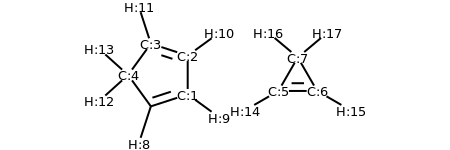

In [2]:
smi1 = 'C1=CC=CC1.C1=CC1'
mol1 = Chem.MolFromSmiles(smi1)
mol1 = Chem.AddHs(mol1)
for i,atom in enumerate(mol1.GetAtoms()):
    atom.SetAtomMapNum(i)
smi_new1 = Chem.MolToSmiles(mol1)
print('The new mapped smiles for checking numbers used in constraints is:', smi_new1)

mol1
# distance and angle constraints to include in the CSV file are:
# constraits_dist = [[3,5,2.35],[0,6,2.35]]
# constraits_dihedral = [[0,3,5,6,0]]

The new mapped smiles for checking numbers used in constraints is: C1([H:9])=[C:1]([H:10])[C:2]([H:11])=[C:3]([H:12])[C:4]1([H:13])[H:14].[C:5]1([H:15])=[C:6]([H:16])[C:7]([H:17])([H:18])[C:8]1([H:19])[H:20]


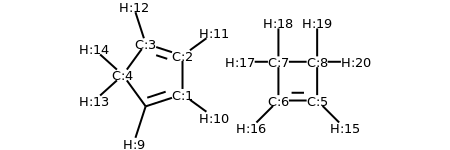

In [3]:
smi1 = 'C1=CC=CC1.C1=CCC1'
mol1 = Chem.MolFromSmiles(smi1)
mol1 = Chem.AddHs(mol1)
for i,atom in enumerate(mol1.GetAtoms()):
    atom.SetAtomMapNum(i)
smi_new1 = Chem.MolToSmiles(mol1)
print('The new mapped smiles for checking numbers used in constraints is:', smi_new1)

mol1
# distance and angle constraints to include in the CSV file are:
# constraits_dist = [[3,5,2.4,[0,6,2.4]]
# constraits_dihedral = [[0,3,5,6,0]]

The new mapped smiles for checking numbers used in constraints is: C1([H:10])=[C:1]([H:11])[C:2]([H:12])=[C:3]([H:13])[C:4]1([H:14])[H:15].[C:5]1([H:16])=[C:6]([H:17])[C:7]([H:18])([H:19])[C:8]([H:20])([H:21])[C:9]1([H:22])[H:23]


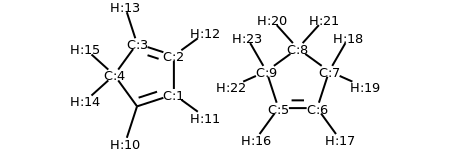

In [4]:
smi1 = 'C1=CC=CC1.C1=CCCC1'
mol1 = Chem.MolFromSmiles(smi1)
mol1 = Chem.AddHs(mol1)
for i,atom in enumerate(mol1.GetAtoms()):
    atom.SetAtomMapNum(i)
smi_new1 = Chem.MolToSmiles(mol1)
print('The new mapped smiles for checking numbers used in constraints is:', smi_new1)

mol1
# distance and angle constraints to include in the CSV file are:
# constraits_dist = [[3,10,2.35],[0,11,2.35]]
# constraits_dihedral = [[0,3,10,11,0]]

### Step 3: CSEARCH conformational sampling

In [5]:
data = pd.read_csv('example2.csv') # read the CSV file with SMILES strings and constraints for TSs (from Step 2)

csearch(input='example2.csv',program='crest',cregen=True,cregen_keywords='--ethr 0.1 --rthr 0.2 --bthr 0.3 --ewin 1')

AQME v 1.2 2022/09/07 13:17:11 
Citation: AQME v 1.2, Alegre-Requena, J. V.; Sowndarya, S.; Perez-Soto, R.; Alturaifi, T. M.; Paton, R. S., 2022. https://github.com/jvalegre/aqme



Starting CSEARCH with 10 job(s) (SDF, XYZ, CSV, etc. files might contain multiple jobs/structures inside)



   ----- Diene -----


   ----- Do1 -----


   ----- Do2 -----


   ----- Do3 -----


   ----- TS1 -----


   ----- TS2 -----


   ----- TS3 -----


   ----- P1 -----


   ----- P2 -----


   ----- P3 -----


Time CSEARCH: 1557.81 seconds




### Step 4: Creating Gaussian input files for optimization and frequency with QPREP

In [6]:
program = 'gaussian'
mem='72GB'
nprocs=16

# COM files for the TSs
sdf_TS_files = glob.glob('CSEARCH/crest/TS*crest.sdf')
qm_input_TS = 'B3LYP/def2tzvp opt=(ts,calcfc,noeigen) freq'
qprep(files=sdf_TS_files,program=program,qm_input=qm_input_TS,mem=mem,nprocs=nprocs)

# COM files for intermediates, reagents and products
sdf_INT_files = glob.glob('CSEARCH/crest/D*.sdf') + glob.glob('CSEARCH/crest/P*.sdf')
qm_input_INT = 'B3LYP/def2tzvp opt freq'

qprep(files=sdf_INT_files,program=program,qm_input=qm_input_INT,mem=mem,nprocs=nprocs)

AQME v 1.2 2022/09/07 13:17:11 
Citation: AQME v 1.2, Alegre-Requena, J. V.; Sowndarya, S.; Perez-Soto, R.; Alturaifi, T. M.; Paton, R. S., 2022. https://github.com/jvalegre/aqme


o  TS3_crest successfully processed at /home/svss/Project-DBcg-Debug/aqme2_20220329/20220906-example-end-to-end/End-to-end_Workflows/End-to-end workflow 2, SN2 PES/AQME inputs/QCALC

o  TS2_crest successfully processed at /home/svss/Project-DBcg-Debug/aqme2_20220329/20220906-example-end-to-end/End-to-end_Workflows/End-to-end workflow 2, SN2 PES/AQME inputs/QCALC

o  TS1_crest successfully processed at /home/svss/Project-DBcg-Debug/aqme2_20220329/20220906-example-end-to-end/End-to-end_Workflows/End-to-end workflow 2, SN2 PES/AQME inputs/QCALC


Time QPREP: 0.01 seconds


AQME v 1.2 2022/09/07 13:17:11 
Citation: AQME v 1.2, Alegre-Requena, J. V.; Sowndarya, S.; Perez-Soto, R.; Alturaifi, T. M.; Paton, R. S., 2022. https://github.com/jvalegre/aqme


o  Do3_crest successfully processed at /home/svss/Project-DBc

### Step 5: Running Gaussian inputs for optimization and frequency calcs externally

In [7]:
# Run the generated COM files (in the QCALC folder) with Gaussian

### Step 6: QCORR analysis

In [8]:
qcorr(files='QCALC/*.log',freq_conv='opt=(calcfc,maxstep=5)',mem=mem,nprocs=nprocs)

AQME v 1.2 2022/09/07 13:17:11 
Citation: AQME v 1.2, Alegre-Requena, J. V.; Sowndarya, S.; Perez-Soto, R.; Alturaifi, T. M.; Paton, R. S., 2022. https://github.com/jvalegre/aqme


o  Analyzing output files in /home/svss/Project-DBcg-Debug/aqme2_20220329/20220906-example-end-to-end/End-to-end_Workflows/End-to-end workflow 2, SN2 PES/AQME inputs/QCALC


Diene_crest_conf_1.log: Termination = normal, Error type = none

Do2_crest_conf_1.log: Termination = normal, Error type = none

P2_crest_conf_1.log: Termination = normal, Error type = none

P1_crest_conf_1.log: Termination = normal, Error type = none

Do3_crest_conf_1.log: Termination = normal, Error type = none

Do1_crest_conf_1.log: Termination = normal, Error type = none

TS1_crest_conf_1.log: Termination = normal, Error type = none

P3_crest_conf_2.log: Termination = normal, Error type = none

TS3_crest_conf_1.log: Termination = normal, Error type = none

TS2_crest_conf_1_man.log: Termination = normal, Error type = none

P3_crest_con

### Step 7: Resubmission of unsuccessful calculations (if any) with suggestions from AQME

In [9]:
# Run the generated COM files (in fixed_inp_folder, see PATH in Step 8) with Gaussian

### Step 8: Creating DLPNO input files for ORCA single-point energy calculations

In [10]:
program = 'orca'
mem='16GB'
nprocs=8

qm_files = os.getcwd()+'/QCALC/success/*.log' # LOG files from Steps 6 and 8
destination =  os.getcwd()+'/SP' # folder where the ORCA output files are generated

# keyword lines for ORCA inputs
qm_input ='DLPNO-CCSD(T) def2-tzvpp def2-tzvpp/C\n'
qm_input += '%scf maxiter 500\n'
qm_input += 'end\n'
qm_input += '% mdci\n'
qm_input += 'Density None\n'
qm_input += 'end\n'
qm_input += '% elprop\n'
qm_input += 'Dipole False\n'
qm_input += 'end'

qprep(destination=destination,files=qm_files,program=program, qm_input=qm_input,mem=mem,nprocs=nprocs, suffix='DLPNO')

AQME v 1.2 2022/09/07 13:17:11 
Citation: AQME v 1.2, Alegre-Requena, J. V.; Sowndarya, S.; Perez-Soto, R.; Alturaifi, T. M.; Paton, R. S., 2022. https://github.com/jvalegre/aqme


o  Diene_crest_conf_1 successfully processed at /home/svss/Project-DBcg-Debug/aqme2_20220329/20220906-example-end-to-end/End-to-end_Workflows/End-to-end workflow 2, SN2 PES/AQME inputs/SP

o  Do2_crest_conf_1 successfully processed at /home/svss/Project-DBcg-Debug/aqme2_20220329/20220906-example-end-to-end/End-to-end_Workflows/End-to-end workflow 2, SN2 PES/AQME inputs/SP

o  P2_crest_conf_1 successfully processed at /home/svss/Project-DBcg-Debug/aqme2_20220329/20220906-example-end-to-end/End-to-end_Workflows/End-to-end workflow 2, SN2 PES/AQME inputs/SP

o  P1_crest_conf_1 successfully processed at /home/svss/Project-DBcg-Debug/aqme2_20220329/20220906-example-end-to-end/End-to-end_Workflows/End-to-end workflow 2, SN2 PES/AQME inputs/SP

o  Do3_crest_conf_1 successfully processed at /home/svss/Project-DBcg-D

### Step 9: Running ORCA inputs for single point energy calcs externally

In [15]:
# Run the generated COM files (in destination, see PATH in Step 9) with ORCA

### Step 10: Calculating PES with goodvibes

In [13]:
orca_files = os.getcwd()+'/SP/*.out' # folder where the OUT files from Step 10 are generated

# copy all the Gaussian LOG files and the ORCA OUT files into a new folder called GoodVibes_analysis (necessary to apply SPC corrections)
opt_files = glob.glob(qm_files)
spc_files = glob.glob(orca_files)
all_files = opt_files + spc_files

w_dir_main  = Path(os.getcwd())
GV_folder = w_dir_main.joinpath('GoodVibes_analysis')
GV_folder.mkdir(exist_ok=True, parents=True)

for file in all_files:
	shutil.copy(file, GV_folder)

# run GoodVibes
os.chdir(GV_folder)
subprocess.run(['python', '-m', 'goodvibes', '--xyz','--pes', '../pes.yaml','--graph','../pes.yaml','-c','1','--spc', 'DLPNO', '*.log',])
os.chdir(w_dir_main)

   GoodVibes v3.2 2022/09/07 15:05:42
   Citation: Luchini, G.; Alegre-Requena, J. V.; Funes-Ardoiz, I.; Paton, R. S. F1000Research, 2020, 9, 291.
   GoodVibes version 3.2 DOI: 10.12688/f1000research.22758.1

o  Requested: --xyz --pes ../pes.yaml --graph ../pes.yaml -c 1 --spc DLPNO 

   Temperature = 298.15 Kelvin   Concentration = 1.0 mol/L
   All energetic values below shown in Hartree unless otherwise specified.

o  Found vibrational scaling factor of 0.985 for B3LYP/def2TZVP level of theory
   I. M. Alecu, unpublished (2011).

   Entropic quasi-harmonic treatment: frequency cut-off value of 100.0 wavenumbers will be applied.
   QS = Grimme: Using a mixture of RRHO and Free-rotor vibrational entropies.
   REF: Grimme, S. Chem. Eur. J. 2012, 18, 9955-9964

   Combining final single point energy with thermal corrections.

   Structure                                       E_SPC             E        ZPE         H_SPC        T.S     T.qh-S      G(T)_SPC   qh-G(T)_SPC
   ***************